In [ ]:
import tensorflow as tf
print(tf._version_)

AttributeError: module 'tensorflow' has no attribute '_version_'

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
tf.config.list_physical_devices('GPU')

[]

In [3]:
!pip install mne numpy pandas scikit-learn torch torchvision matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling n

In [4]:
import zipfile
import os
import pandas as pd

# Change this to the actual path of your .zip file
zip_path = '/content/drive/MyDrive/archive (1).zip'  # Verify this path
extract_path = '/content/EEG_data'  # Verify this path

# Extract all CSV files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files, printing the list to check for files
csv_files = [f for f in os.listdir(extract_path) if f.endswith('.csv')]

# Check if any CSV files were found and print a message if not
if not csv_files:
    print("Warning: No CSV files found in the extracted directory. Check the zip file and extraction path.")
else:
    print(f"CSV files found: {csv_files}")  # Print to check if CSV files are found

    dataframes = []
    for file in csv_files:
        file_path = os.path.join(extract_path, file)
        df = pd.read_csv(file_path)
        dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    combined_df.head()

In [5]:
# List everything in the extracted folder, including subfolders
for root, dirs, files in os.walk(extract_path):
    for name in files:
        print(os.path.join(root, name))

/content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_38.csv
/content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_1.csv
/content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_3.csv
/content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_26.csv
/content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_16.csv
/content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_31.csv
/content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_11.csv
/content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_30.csv
/content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_34.csv
/content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_2.csv
/content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_18.csv
/content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_17.csv
/content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_15.csv
/content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_8.csv
/content/E

In [6]:
import os

data_paths = {
    "Stroop": [],
    "Relax": [],
    "Arithmetic": [],
    "Mirror_image": []
}

base_dir = "/content/EEG_data"

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".csv"):
            full_path = os.path.join(root, file)
            for task in data_paths.keys():
                if task in full_path:
                    data_paths[task].append(full_path)

# Example: Check one task
print("Relax files:", data_paths["Relax"][:5])

Relax files: ['/content/EEG_data/Relax-20231211T181913Z-001/Relax/Relax_sub_23.csv', '/content/EEG_data/Relax-20231211T181913Z-001/Relax/Relax_sub_28.csv', '/content/EEG_data/Relax-20231211T181913Z-001/Relax/Relax_sub_10.csv', '/content/EEG_data/Relax-20231211T181913Z-001/Relax/Relax_sub_35.csv', '/content/EEG_data/Relax-20231211T181913Z-001/Relax/Relax_sub_1.csv']


In [7]:
task_labels = {
    'Relax': 0,
    'Mirror Image': 1,
    'Arithmetic': 1,
    'Stroop': 2
}

Processed /content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_38.csv -> (36, 512, 33)
Processed /content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_1.csv -> (36, 512, 33)
Processed /content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_3.csv -> (36, 512, 33)
Processed /content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_26.csv -> (36, 512, 33)
Processed /content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_16.csv -> (36, 512, 33)
Processed /content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_31.csv -> (36, 512, 33)
Processed /content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_11.csv -> (36, 512, 33)
Processed /content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_30.csv -> (36, 512, 33)
Processed /content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_34.csv -> (36, 512, 33)
Processed /content/EEG_data/Stroop-20231211T181911Z-001/Stroop/Stroop_sub_2.csv -> (36, 512, 33)
Processed /content/EEG_

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 508, 128)       │        21,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 508, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 254, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 250, 256)       │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 250, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 125, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 121, 512)       │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 121, 512)       │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 60, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     7,864,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,742,401 (33.35 MB)

 Trainable params: 8,740,609 (33.34 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.7780 - loss: 1.4522 - val_accuracy: 0.3333 - val_loss: 8.1048 - learning_rate: 0.0010
Epoch 2/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.9187 - loss: 0.4249 - val_accuracy: 0.3338 - val_loss: 11.4757 - learning_rate: 0.0010
Epoch 3/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.9450 - loss: 0.2499 - val_accuracy: 0.4250 - val_loss: 4.4587 - learning_rate: 0.0010
Epoch 4/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.9718 - loss: 0.1201 - val_accuracy: 0.3347 - val_loss: 21.3987 - learning_rate: 0.0010
Epoch 5/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.9809 - loss: 0.0881 - val_accuracy: 0.5417 - val_loss: 3.2011 - learning_rate: 0.0010
Epoch 6/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.9769 - loss: 0.0876 - val_accuracy: 0.6727 - val_loss: 6.0048 - learning_rate: 0.0010
Epoch 7/40
90/90 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.9752 - loss: 0.0995 - val_a

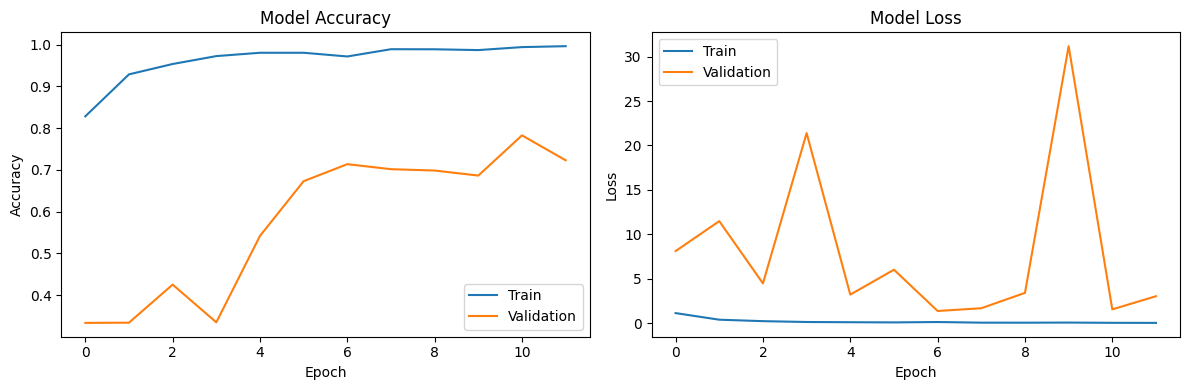

68/68 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step
AUC-ROC: 0.75
              precision    recall  f1-score   support

           0       0.66      0.29      0.40       720
           1       0.72      0.93      0.81      1440

    accuracy                           0.71      2160
   macro avg       0.69      0.61      0.61      2160
weighted avg       0.70      0.71      0.67      2160

Precision: 0.70, Recall: 0.71, F1: 0.67
Chance Accuracy: 0.60


In [8]:
import zipfile
import os
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE

# === Step 1: Extract Dataset ===
zip_path = '/content/drive/MyDrive/archive (1).zip'
extract_path = '/content/EEG_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# === Step 2: Load CSV Files into Dictionary by Task ===
data_paths = {
    "Stroop": [],
    "Relax": [],
    "Arithmetic": [],
    "Mirror_image": []
}

for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith(".csv"):
            full_path = os.path.join(root, file)
            for task in data_paths.keys():
                if task in full_path:
                    data_paths[task].append(full_path)

# === Step 3: Task Labels (for Binary Classification) ===
task_labels = {
    'Relax': 0,
    'Mirror_image': 1,
    'Arithmetic': 1,
    'Stroop': 1
}

# === Step 4: Preprocessing Functions ===
def bandpass_filter(data, lowcut=0.5, highcut=50, fs=256):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(4, [low, high], btype='band')
    if len(data) > 3 * max(len(a), len(b)):
        return filtfilt(b, a, data)
    else:
        return data

def preprocess_data(file_path, fs=256, window_size=2):
    df = pd.read_csv(file_path)
    eeg_channels = [col for col in df.columns if col not in ['Time', 'timestamp', 'label']]

    # Filter
    for ch in eeg_channels:
        df[ch] = bandpass_filter(df[ch].values, fs=fs)

    # Normalize
    scaler = MinMaxScaler()
    df[eeg_channels] = scaler.fit_transform(df[eeg_channels])

    # Segment
    segment_size = fs * window_size
    segments = []
    for start in range(0, len(df) - segment_size, segment_size // 2):
        segment = df.iloc[start:start + segment_size][eeg_channels].values
        segments.append(segment)

    return np.array(segments)

# === Step 5: Load, Preprocess and Label Data ===
X, y, groups = [], [], []
for task, file_list in data_paths.items():
    label = task_labels[task]
    for file in file_list:
        try:
            segments = preprocess_data(file)
            X.extend(segments)
            y.extend([label] * len(segments))
            groups.extend([os.path.basename(file).split('_')[0]] * len(segments))  # Subject IDs
            print(f"Processed {file} -> {segments.shape}")
        except Exception as e:
            print(f"Error in {file}: {e}")

X = np.array(X)
y = np.array(y)
groups = np.array(groups)
print("Final Data Shapes ->", X.shape, y.shape)

# === Step 6: Train/Test Split ===
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=groups))
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# Ensure both classes are present in the test set
if len(set(y_test)) == 1:
    print("Only one class present in test set. Adjusting test set to include both classes.")

    # Adjust test set to include both classes
    test_class0_idx = np.where(y_test == 0)[0]
    test_class1_idx = np.where(y_test == 1)[0]

    if len(test_class0_idx) == 0:
        # If no class 0 samples, take some from train set
        train_class0_idx = np.where(y_train == 0)[0]
        num_samples_to_move = min(len(train_class0_idx), len(test_class1_idx) // 2)
        move_idx = np.random.choice(train_class0_idx, num_samples_to_move, replace=False)

        # Move samples from train to test
        X_test = np.vstack((X_test, X_train[move_idx]))
        y_test = np.hstack((y_test, y_train[move_idx]))

        # Remove moved samples from train
        X_train = np.delete(X_train, move_idx, axis=0)
        y_train = np.delete(y_train, move_idx)

    elif len(test_class1_idx) == 0:
        # If no class 1 samples, take some from train set
        train_class1_idx = np.where(y_train == 1)[0]
        num_samples_to_move = min(len(train_class1_idx), len(test_class0_idx) // 2)
        move_idx = np.random.choice(train_class1_idx, num_samples_to_move, replace=False)

        # Move samples from train to test
        X_test = np.vstack((X_test, X_train[move_idx]))
        y_test = np.hstack((y_test, y_train[move_idx]))

        # Remove moved samples from train
        X_train = np.delete(X_train, move_idx, axis=0)
        y_train = np.delete(y_train, move_idx)

# === Step 7: Oversample Minority Class ===
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train.reshape(-1, X_train.shape[1]*X_train.shape[2]), y_train)
X_train_res = X_train_res.reshape(-1, X_train.shape[1], X_train.shape[2])

# === Step 8: Create Enhanced CNN Model ===
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(128, 5, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling1D(2),

        Conv1D(256, 5, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(2),

        Conv1D(512, 5, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(2),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn_model((X_train.shape[1], X_train.shape[2]))
model.summary()

# === Step 9: Train the Model ===
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

history = model.fit(
    X_train_res, y_train_res,
    epochs=40,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# === Step 10: Evaluate and Visualize ===
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n Test Accuracy: {test_acc:.4f}")

# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Additional Evaluation Metrics
y_pred_probabilities = model.predict(X_test).flatten()
y_pred_class = (y_pred_probabilities > 0.5).astype(int)

if len(set(y_test)) == 1:
    print("Only one class present cannot calculate AUC_ROC")
else:
    auc = roc_auc_score(y_test, y_pred_probabilities)
    print(f"AUC-ROC: {auc:.2f}")

# Classification Report with Zero Division Handling
print(classification_report(y_test, y_pred_class, zero_division=0))

# Precision, Recall, F1 Score with Zero Division Handling
precision = precision_score(y_test, y_pred_class, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_class, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_class, average='weighted', zero_division=0)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

# Dummy Classifier for Baseline
dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
print(f"Chance Accuracy: {dummy.score(X_test, y_test):.2f}")